## Just some imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading dataset 

In [2]:
raw_data = pd.read_csv("netflix_titles.csv")
raw_data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## dataset info

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# Cleaning the data

## make a copy to still have the raw data 

In [7]:
df = raw_data.copy()

Dealing with the missing data

    1- Replace blank countries with the mode (most common) country
    2- We keep director as it could be interesting to look at a certain director's films
    3- We keep cast as it could be interesting to look at a certain cast's films


In [8]:
# Replacments
df['country'] = df['country'].fillna(df['country'].mode()[0])


raw_data['cast'].replace(np.nan, 'No Data',inplace  = True)
raw_data['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops

df.dropna(inplace=True)

# Drop Duplicates

df.drop_duplicates(inplace= True)

In [5]:
df.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


## Fixing the date column

In [11]:
df["date_added"] = pd.to_datetime(df['date_added'])

df['month_added']=df['date_added'].dt.month
df['month_name_added']=df['date_added'].dt.month_name()
df['year_added'] = df['date_added'].dt.year

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021


# Visualization and explore the data to answer questions 

### Movie & TV Show distribution

In [18]:
x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

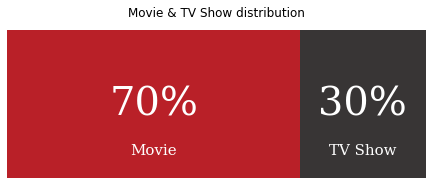

In [19]:
fig, ax = plt.subplots(1,1,figsize=(7.5, 3))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')


for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

plt.title("Movie & TV Show distribution")
ax.legend().set_visible(False)
plt.show()

So we have vastly more movies than TV shows on Netflix.

In [19]:
df['count'] = 1
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('South Korea', 'S. Korea',inplace=True)


In [20]:
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]
data

first_country
USA          4031
India        1008
UK            627
Canada        271
Japan         257
France        212
S. Korea      211
Spain         181
Mexico        134
Australia     115
Name: count, dtype: int64

<BarContainer object of 10 artists>

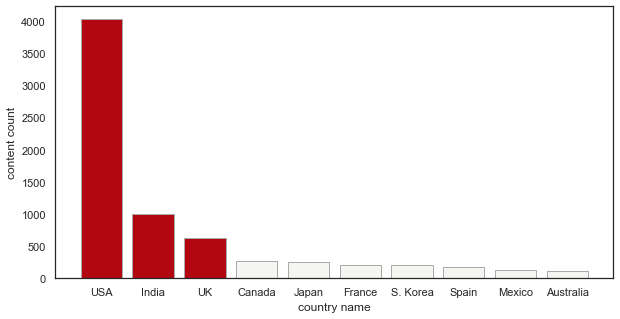

In [21]:
plt.figure(figsize = (10 , 5))
plt.xlabel('country name')
plt.ylabel('content count')
plt.bar(data.index , data.values , edgecolor = 'darkgray' ,  color=['#b20710', '#b20710', '#b20710', '#f5f5f1', '#f5f5f1', '#f5f5f1', '#f5f5f1', '#f5f5f1', '#f5f5f1', '#f5f5f1'])


In [368]:
import plotly.graph_objs as go
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)
choropleth_map = go.Figure(
    data = {
        'type':'choropleth',
        'locations':data.index,
        'locationmode':'country names',
        'colorscale':'viridis',
        'z':data.values,
        'colorbar':{'title':'population density color'},
        'marker': {
            'line': {
                'color':'rgb(255,255,255)',
                'width':2
            }
        }
    },     
    layout = {      
      'geo':{
          'scope':'world', 
      }  
    })
choropleth_map

In [25]:
df['duration_time'] = df['duration'].apply(lambda x: x.split()[0])

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added,count,first_country,first_director,duration_time
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021,1,USA,Kirsten Johnson,90
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021,1,South Africa,No Data,2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021,1,USA,Julien Leclercq,1


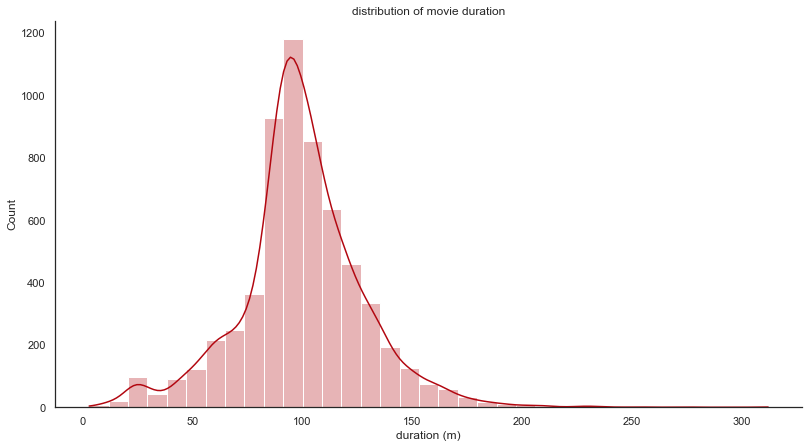

In [26]:
durationMovie =  df[df['type'] == 'Movie']['duration_time']
durationMovieList  = durationMovie.tolist()
res = [eval(i) for i in durationMovieList]

pl = sns.displot(res  , kde = True ,  color = "#b20710" , bins = 35 , height=6, aspect=1.9 , alpha = 0.3 )
pl.set(title ="distribution of movie duration", xlabel = "duration (m)" );



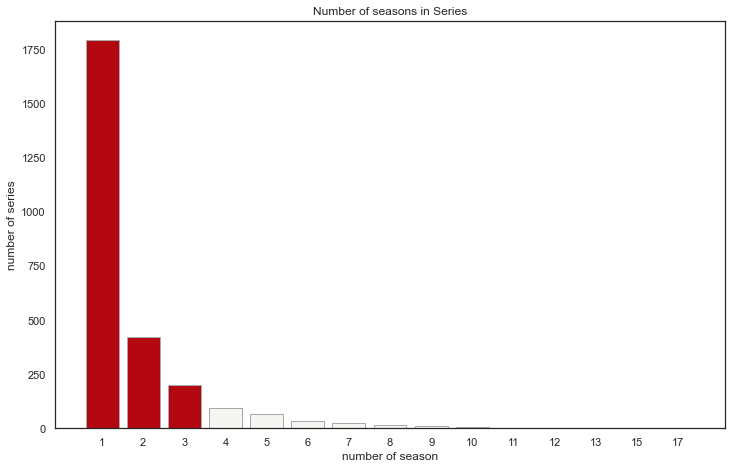

In [32]:
from collections import Counter
durationSeries =  df[df['type'] == 'TV Show']['duration_time']
durationSeriesList  = durationSeries.tolist()
res2 = [eval(i) for i in durationSeriesList]
resSeries = dict(Counter(res2))
df_Series = pd.DataFrame(resSeries.items(), columns=['number', 'count'])
df_Series.sort_values(by = ['number'] , inplace= True)
list_string = map(str, list(df_Series.number))
plt.figure(figsize = (12,7.5))
plt.title('Number of seasons in Series')
plt.xlabel('number of season')
plt.ylabel('number of series')
colors = ['#b20710'] * 3
colors.extend(['#f5f5f1'] * 14)
plt.bar(list(list_string) , df_Series['count'] , color = colors , edgecolor = 'darkgray' )
plt.show()

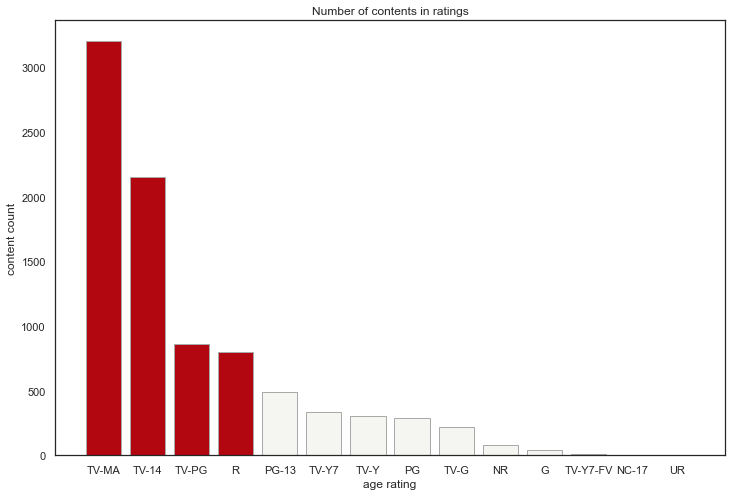

In [370]:
order = pd.DataFrame(df.groupby('rating')['count'].sum().sort_values(ascending=False).reset_index())
plt.figure(figsize = (12, 8))
colors = ['#b20710'] * 4
colors.extend(['#f5f5f1'] * 10)
plt.title('Number of contents in ratings')
plt.xlabel('age rating')
plt.ylabel('content count')
plt.bar(order.rating , order['count'] , edgecolor = 'darkgray' , color = colors);

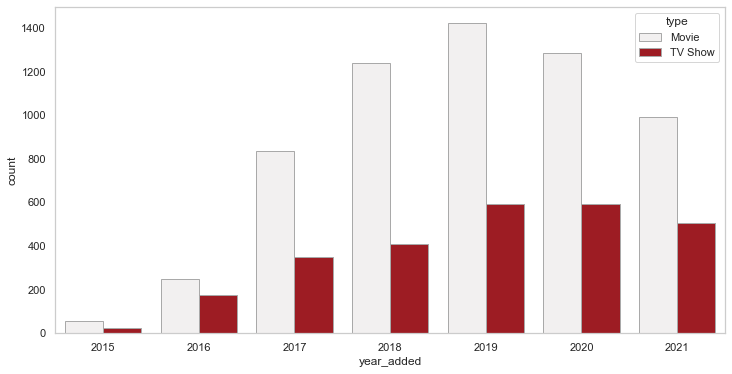

In [264]:
plt.figure(figsize = (12 , 6))   
sns.countplot(df[df['year_added'] > 2014], x = 'year_added', hue = "type" , color = '#b20710' , edgecolor = 'darkgray' );


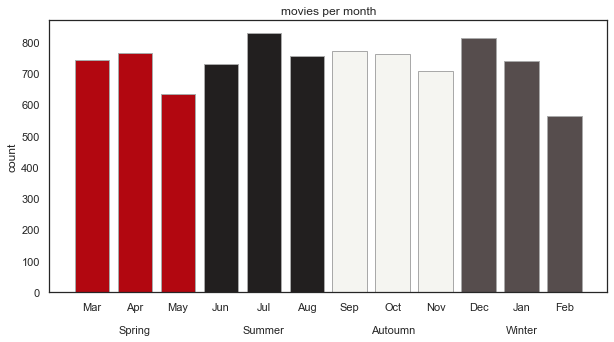

In [14]:
data = df.groupby('month_added')['count'].sum()
index = list(data.index)
values = list(data.values)
values.append(values[0])
values.append(values[1])
values = values[2:]
plt.figure(figsize = (10,5) )
sns.set_theme(style='white')
colors = ['#b20710']*3
colors.extend(['#221f1f']*3)
colors.extend(['#f5f5f1']*3)
colors.extend(['#564d4d']*3)

plt.bar(index , values , color = colors , edgecolor = 'darkgray')
plt.title('movies per month')
plt.ylabel('count')

plt.xticks(np.arange(1,13), [ 'Mar', 'Apr\n\nSpring', 'May', 'Jun', 'Jul\n\nSummer' , 'Aug', 'Sep', 'Oct\n\nAutoumn' , 'Nov' , 'Dec' , 'Jan\n\nWinter', 'Feb'])
plt.show()


### Most Prolific Director on Netflix

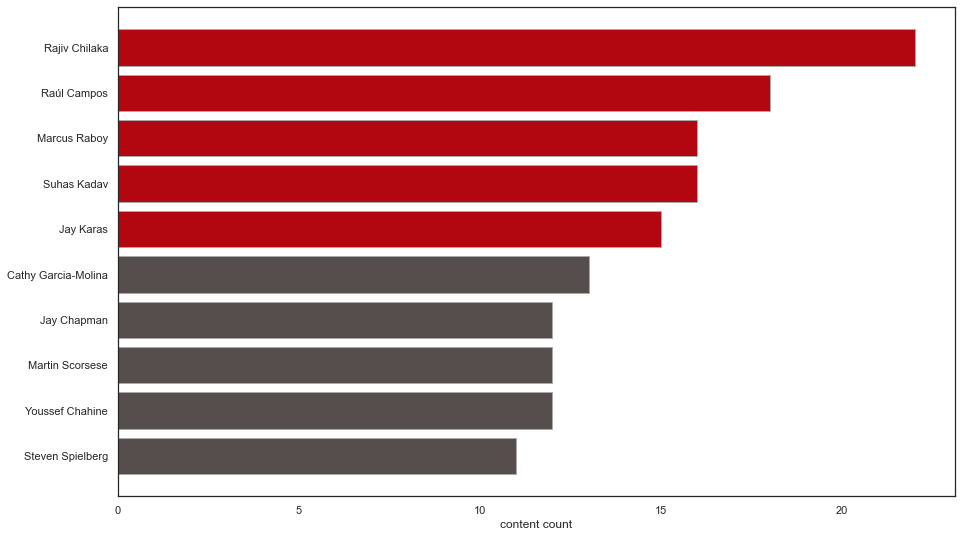

In [68]:
df['first_director'] = df['director'].apply(lambda x: x.split(',')[0])

data = df.groupby('first_director')['count'].sum().sort_values()[-11:-1]
plt.figure(figsize=(15,9))
plt.xlabel('content count')
colors = ['#564d4d']*5
colors.extend(['#b20710']*5)
plt.barh(data.index , data.values , edgecolor = 'darkgray' ,  color=colors);

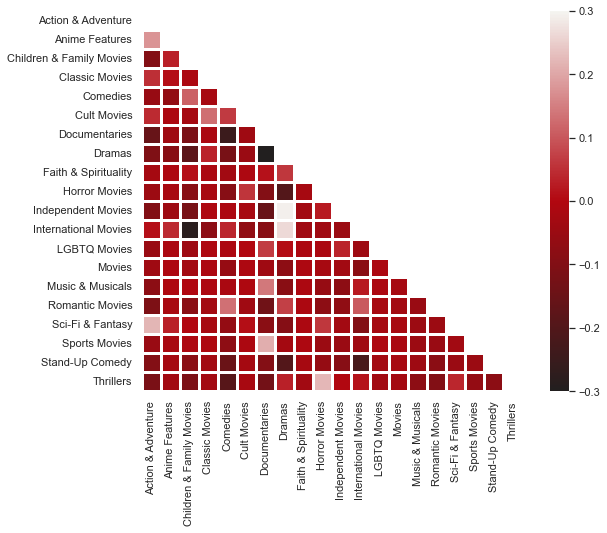

In [16]:
from sklearn.preprocessing import MultiLabelBinarizer 

import matplotlib.colors

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710','#f5f5f1'])

def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    pl = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    plt.show()
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]


genre_heatmap(df_movies, 'Movie')
plt.show()

             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             Internatinal Movies are rarely
             in the Children's genre.